***Creator: Changhee Kang***

**Part 2 - Developing predictive model development without sampling techniques applied**

**Note that:** data manupulation and exploration techniques illustrated in this demonstraton does not mean that the audience have to follow the same ways as shown here.

# Device Failure and Maintenance Prediction Model

It is to build a predictive model with diagnoses of telemetry attributes to classify whether maintenance should be performed on devices or not. The column used for prediction is set with the column name, "failure", with binary value 0 for "non-failure" and 1 for "failure". The goal is to minimize false positives and false negatives.

# Assumptions

As there is no meta data that describes the current dataset, assumptions can be applied to the current dataset. The dataset consists of diagnoses of telemetry attributes, so it might be rational that some variables are assumed to consist of *categorical nominal type values* while other variables would consist of *continuous type values*. 

# Roadmap

This part is to demonstrate the predictive model development with an imbalanced dataset. In this part, the predictive model will be developed with any sampling techniques to observe how the predictive will behave with such an extreamly imblanced dataset. Some combinations of variables will be applied to the model development and see how the model goes.

# Data Loading

import necessary python modules to load the current dataset into memory.

In [4]:
import pandas as pd
import numpy as np

Load the dataset into memory.

In [5]:
datafile = r'/home/thomas/Downloads/device_failure.csv'
dataset = pd.read_csv(datafile, sep=',', engine='python')

See if the dataset has been loaded correctly. There should be 12 columns meaning 12 variables. 

In [6]:
dataset.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


# Variable importances

- Without *'Oversampling'* applied.

In [11]:
# import ExtraTreesClassifier.
from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib to plot graphical statistics.
import matplotlib.pyplot as plt

In [12]:
# Test features for importances.
def examine_features(x_train, y_train):
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
    forest.fit(x_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. attribute %d (%f)" % (f + 1, indices[f] + 1, importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.rcParams['figure.figsize'] = (18.0, 4.5)
    plt.figure()
    plt.title("Feature importance scores")
    plt.bar(range(X.shape[1]), importances[indices], color="red", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices+1)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Apply *'Random Oversampling'*

--- Before sampling ---
No. of non-failures: 124388	 No. of failures: 106
0    124388
1       106
Name: failure, dtype: int64


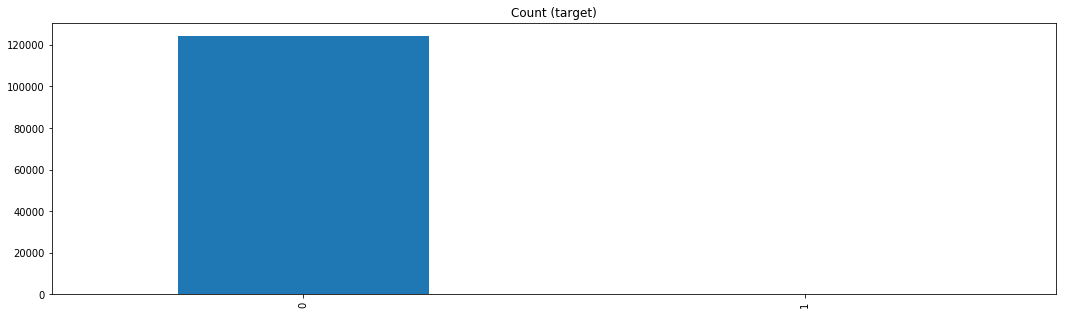


--- After random oversampling ---
date          248776
device        248776
failure       248776
attribute1    248776
attribute2    248776
attribute3    248776
attribute4    248776
attribute5    248776
attribute6    248776
attribute7    248776
attribute8    248776
attribute9    248776
dtype: int64
1    124388
0    124388
Name: failure, dtype: int64


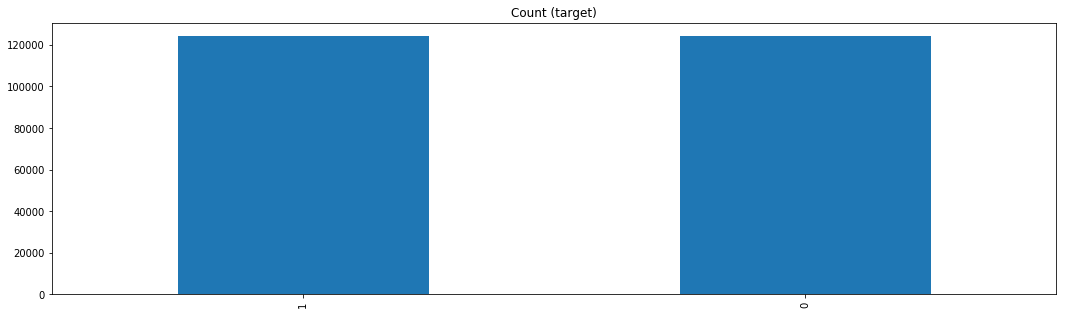

In [24]:
# Define class counts.
count_non_failure, count_failure = dataset.failure.value_counts()
print("--- Before sampling ---")
print("No. of non-failures: {}\t No. of failures: {}".format(count_non_failure, count_failure))
plt.rcParams['figure.figsize'] = (18.0, 5.0)
print(dataset.failure.value_counts())
dataset.failure.value_counts().plot(kind='bar', title='Count (target)');
plt.show()
print()

print('--- After random oversampling ---')
# Divide by class.
df_failure = dataset[dataset['failure'] == 1]
df_non_failure = dataset[dataset['failure'] == 0]

# Apply random oversampling.
df_failure_over = df_failure.sample(count_non_failure, replace=True)

# Concatenate oversampled data with non_failure dataframe.
oversampled_dataset = pd.concat([df_non_failure, df_failure_over], axis=0)
print(oversampled_dataset.count())

plt.rcParams['figure.figsize'] = (18.0, 5.0)
print(oversampled_dataset.failure.value_counts())
oversampled_dataset.failure.value_counts().plot(kind='bar', title='Count (target)');
plt.show()

*'Randome Oversampling'* randomly increases samples with replacement and it has increased the number of data points in failure to the equal number of data points in non-failure. Now, the number of data points both in failure and non-failure is equal.

Feature importance test on original dataset
Feature ranking:
1. attribute 1 (0.278196)
2. attribute 6 (0.276792)
3. attribute 4 (0.123269)
4. attribute 2 (0.102534)
5. attribute 5 (0.082676)
6. attribute 7 (0.079533)
7. attribute 8 (0.044559)
8. attribute 3 (0.012441)


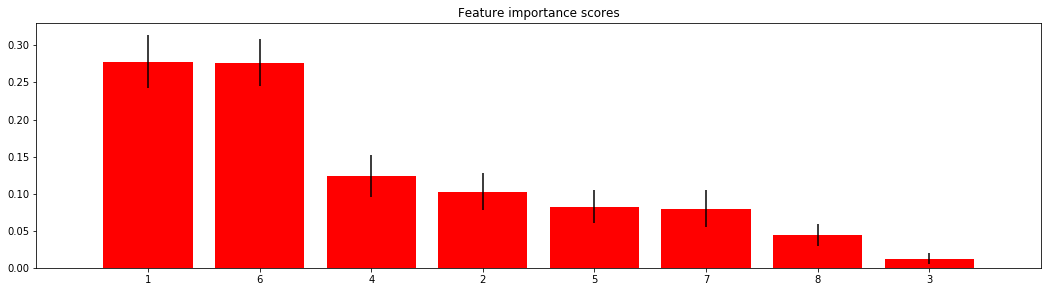

Feature importance test on oversampled dataset
Feature ranking:
1. attribute 4 (0.183476)
2. attribute 1 (0.182864)
3. attribute 6 (0.164457)
4. attribute 2 (0.148207)
5. attribute 7 (0.147339)
6. attribute 5 (0.122345)
7. attribute 8 (0.033167)
8. attribute 3 (0.018145)


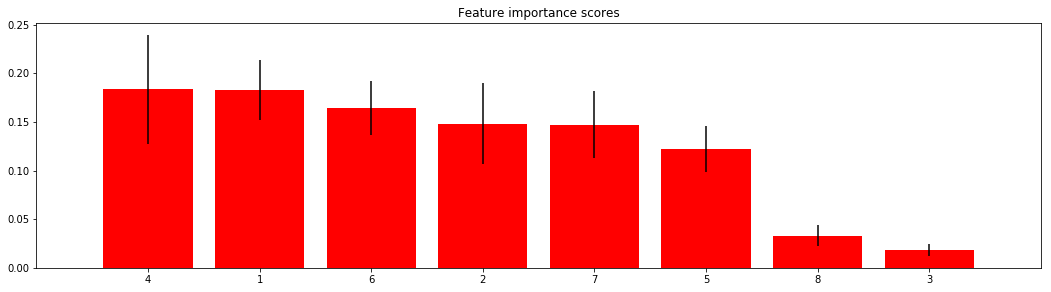

In [25]:
print("Feature importance test on original dataset")
X = dataset[['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']]
Y = dataset.failure
examine_features(X,Y)

print("Feature importance test on oversampled dataset")
X = oversampled_dataset[['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']]
Y = oversampled_dataset.failure
examine_features(X,Y)

As shown above, the rank of variable importance scores has been rearranged by the effect of *'Random Oversampling'*. Having applied *'Random Oversampling'*, *'attribute4'* now takes the first important variable position. *'attribute3'* and *'attribute8'* takes the same places as before. It might be valuable to take a closer look at the result of *'Random Oversampling'* so as to understand how variables are scored for importance. *'attribute4'* is now the most importance varible, why is it so? It is because both *'attribute1'*, *'attribute2'*, and *'attribute5'* have more unique values than *'attribute4'* and *'attribute7'*; however, with *'Random Oversampling'*, *'attribute4'* and *'attribute7'* can now reduce *'entropy'* more efficiently with less unique values; thus, *'attribute'* and *'attribute7'* take higher ranks after *'Random Oversampling'*. 

One thing that should be noted is that *'attribute7'* is recognized as more important than *'attribute5'*. It is because *'attribute7'* can now reduce entropy more efficiently with less unique values than *'attribute5'*.

It should also be noted that there are no rank changes to *'attribute8'*(*'attribute8'* means *'attribute9'*) and *'attribute3'*. Why is it so? It might be because *'attribute3'* and *'attribute8'* have less numbers of unique values to failure. Recall that the predictive model does not only need ways to non-failure but it also learn ways to failure, too.

# Build the predictive model without sampling

The predictive model will be developed with cross-validation; however, there will be no sampling techniques applied to see the impact of sampling techniques. First, import necessary modules to build a predictive model.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from imblearn import over_sampling

from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, average_precision_score, precision_recall_curve, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score

from IPython.display import HTML, display
import tabulate

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

The following model building function will do the job for predictive model developments:

In [58]:
'''
    Models are built with stratified 10-cross-validation by default. The splitting of data into 
    folds will ensure that each fold has the same proportion of observations with a given 
    categorical value, such as the class outcome value. 
    
    This will produce a predictive model according to a set of function parameters such as:
    - X: holds independent variables.
    - Y: holds the target variable.
    - DEPTH: the maximum number of depths each estimator can span.
    - NEIGHBORS: the number of neighbors to use for data augmentation.
    - ESTIMATORS: the number of estimators.
    - WICH_RF: the choice of model development approaches.(no sampling, over-sampling, smote-sampling)
        1 - SMOTE.
        2 - Random oversampling on minority class.
        0 - No sampling techniques applied.
    
    At the end of the funtion execution, statistical results will be provided on the console.
'''
def run_model(SUMMARY_TABLE, X, Y, DEPTH, NEIGHBORS, ESTIMATORS, WHICH_MODEL, WHICH_SAMPLING):
    predicted = None
    
    # Convert to dataframe to number to split for cross-valation runs.
    numpy_X = X.to_numpy()
    numpy_Y = Y.to_numpy()

    # Create 10-stratified-folds.
    skf = StratifiedKFold(n_splits=10)
    rnd_cnt = 1

    total_fpr = 0
    total_acc = 0
    total_err = 0
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    total_tp = 0
    total_tn = 0
    total_train_acc = 0
    total_fp = 0
    
    # Run 10-stratified-cross-validations.
    for train_index, test_index in skf.split(numpy_X, numpy_Y):
        # Data is numpied.
        x_train, x_test = numpy_X[train_index], numpy_X[test_index]
        y_train, y_test = numpy_Y[train_index], numpy_Y[test_index]

        # convert to dataframe from numpied data.
        x_train = pd.DataFrame(x_train.reshape(-1, len(X.columns)),columns=X.columns)    
        x_test = pd.DataFrame(x_test.reshape(-1, len(X.columns)),columns=X.columns)
        y_train = pd.DataFrame(y_train.reshape(-1, 1))
        y_test = pd.DataFrame(y_test.reshape(-1, 1))    
        
        '''
            Do sampling accordingly.
        '''
        if WHICH_SAMPLING == 'OVER': 
            # Concatenate y_train to x_train to over-sample".
            train_dataset = x_train
            train_dataset['failure'] = y_train

            # Split train dataset into true negatives and true positives
            train_target_0 = train_dataset[train_dataset.iloc[:,-1] == 0]
            train_target_1 = train_dataset[train_dataset.iloc[:,-1] == 1]

            #Over-sample data with replacement allowed for the minority class.
            train_target_1_oversample = train_target_1.sample(len(train_target_0), replace=True)
            train_target_1_oversample.failure.value_counts()
            train_oversample = pd.concat([train_target_1_oversample, train_target_0], axis=0)

            x_train = train_oversample # Assign over-sampled train dataset to x_train.
            y_train = x_train.failure # Copy y values from x_train.
            x_train.drop('failure', axis=1, inplace=True) # Drop y values from x_train.
        elif WHICH_SAMPLING == 'UNDER':   
            # Create random forest classifier with downsampling for the majority class.
            x_train_res, y_train_res = RandomUnderSampler(random_state=0).fit_sample(x_train, y_train)
            x_train = x_train_res
            y_train = y_train_res
        else: 
            pass
        
        '''
            Select and run the model accordingly.
        '''
        train_acc = 0
        
        if WHICH_MODEL == 'RF': # Random Forest.
            rf = RandomForestClassifier(random_state=0, n_estimators=ESTIMATORS, max_depth=DEPTH)
            rf.fit(x_train,y_train) # Fit the model to training dataset.
            #predicted = rf.predict(x_test) # Get prediction result.
            train_acc = rf.score(x_train, y_train) # train set 정확도
            y_pred = rf.predict(x_test)#(rf.predict_proba(x_test)[:,1] >= prob).astype(bool)
            
        
        # Show statistics for each round.
        #print("Fold - {}".format(rnd_cnt))
        '''
            Confusion Matrix
        '''
        #print("-------------  Confusion Matrix  ----------------")
        cm = confusion_matrix(y_test, y_pred)
        print("Fold - {}".format(rnd_cnt))
        print(cm)
        print()
        '''
            Get individual counts from confusion matrix for further statistics for 
            true positive, true negatve, false positive, and false negative.
        '''
        TN = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TP = cm[1][1]
        
        # Compute totals of true positives and true negatives.
        total_tp += TP
        total_tn += TN
        total_fp += FP
        
        '''
            Statistics for accuray, precision, recall, overall error, and etc..
        '''
        #print("-------------     Statistics     ----------------")
        acc = (TN+TP)/(TN+TP+FN+FP)
        precision = TP/(FP+TP)
        recall = TP/(FN+TP)
        f1 = 2*(precision*recall/(precision+recall))
        overall_error = (FP+FN)/(TP+TN+FP+FN)     
        fpr = FP/(TN+FP)
        
        # Compute totals of other statistics.
        total_err += overall_error
        total_acc += acc
        total_precision += precision
        total_recall += recall
        total_f1 += f1
        total_fpr += fpr
        total_train_acc += train_acc
        
        # Increment round by 1.
        rnd_cnt += 1
    
    # Compute averages.
    avg_err = round((total_err/10)*100, 2)
    avg_acc = round((total_acc/10)*100, 2)
    avg_pre = round((total_precision/10)*100, 2)
    avg_rec = round((total_recall/10)*100, 2)
    avg_f1 = round((total_f1/10)*100, 2)
    avg_tp = round((total_tp/10), 2)
    avg_tn = round((total_tn/10), 2)
    avg_fpr = round((total_fpr/10)*100, 2)
    avg_train_acc = round((total_train_acc/10)*100, 2)
    avg_fp = round((total_fp/10)*100, 2)

    show_classifier_summary(SUMMARY_TABLE, WHICH_MODEL, WHICH_SAMPLING, ESTIMATORS, DEPTH, NEIGHBORS, len(X.columns), avg_train_acc, avg_acc, avg_pre, avg_rec, avg_fpr, avg_err, avg_f1, avg_tp, avg_tn, avg_fp, X)

A summary function will be defined to show the result of a predictive model performance.

In [59]:
def show_classifier_summary(summary_table, 
                            which_model, 
                            which_sample_tech, 
                            estimators,
                            depth,
                            neighbor,
                            var_len,
                            avg_train_acc,
                            avg_acc, 
                            avg_pre, 
                            avg_rec, 
                            avg_fpr,
                            avg_err, 
                            avg_f1,
                            avg_tp, 
                            avg_tn, 
                            avg_fp,
                            variables):
    
    summary_table.append(
            [which_model, 
            which_sample_tech, 
            estimators,
            depth,
            neighbor,
            var_len,
            avg_train_acc,
            avg_acc, 
            avg_pre,
            avg_rec,
            avg_fpr,
            avg_f1,
            avg_err, 
            avg_tp, 
            avg_tn, 
            avg_fp,
            variables.columns.tolist()]
        )
    display(HTML(tabulate.tabulate(summary_table, tablefmt='html')))

*'attribute8'* is a duplicate of *'attribute7'* so it is removed from the variable list and not used for the model development.

In [61]:
rf_summary_table = [["MODEL", "SAMPLING", "ESTIMATORS", "DEPTH", "NEIGHBORS", "VARS", "T_ACC", "ACC.", "PRE.", "REC.", "FPR.", "F1", "ERR.", "TP", "TN", "FP", "VARS."]]

# Set variables to be participated in the model.
X = dataset[['attribute1', 'attribute2', 'attribute3', 'attribute4','attribute5', 'attribute6', 'attribute7', 'attribute9']]
Y = dataset.failure
DEPTH = 7 # Define the max depth to 7.
ESTIMATORS = 100 # Defind the number of decision trees to participate in voting.
NEIGHBORS = 0
run_model(rf_summary_table, X, Y, DEPTH, NEIGHBORS, ESTIMATORS, 'RF', 'NO') # 0 for random forest without oversampling

Fold - 1
[[12439     0]
 [   11     0]]

Fold - 2
[[12439     0]
 [   11     0]]

Fold - 3
[[12439     0]
 [   11     0]]

Fold - 4
[[12439     0]
 [   11     0]]

Fold - 5
[[12439     0]
 [   11     0]]

Fold - 6
[[12439     0]
 [   11     0]]

Fold - 7
[[12438     1]
 [   10     0]]

Fold - 8
[[12439     0]
 [   10     0]]

Fold - 9
[[12438     0]
 [   10     0]]

Fold - 10
[[12438     0]
 [   10     0]]



MODEL,SAMPLING,ESTIMATORS,DEPTH,NEIGHBORS,VARS,T_ACC,ACC.,PRE.,REC.,FPR.,F1,ERR.,TP,TN,FP,VARS.
RF,NO,100,7,0,8,99.92,99.91,nan,0.0,0.0,nan,0.09,0.0,12438.7,10.0,"['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']"


The predictive model seems unable to classify devices with failure, at all. It is, kind of, an expected result for the predictive model being unable to classify devices with failure because of the nature of *'Random Forest'* learning algirhtm. *'Random Forest'* chooses varaibles and data points randomly so devices with failure in the dataset will, therefore, hardly ever gets chances to be picked for the predictive model to learn ways to failure. Even though devices with failure were picked by the algorithm, it will not help classify those devices as failure because there are devices with non-failure that have the same values.

In addition, the *'traning accuracy'* is slighly higher than *'accuracy'* on *'validation dataset'*, the predictive model seems slightly overfit. 

The next experimentation will show the predictive model performance with only categorical variables and also no sampling techniques will be applied.

In [63]:
# Set variables to be participated in the model.
X = dataset[['attribute3', 'attribute4','attribute5', 'attribute7', 'attribute9']]
Y = dataset.failure
DEPTH = 5 # Define the max depth to 7.
ESTIMATORS = 100 # Defind the number of decision trees to participate in voting.
NEIGHBORS = 0
run_model(rf_summary_table, X, Y, DEPTH, NEIGHBORS, ESTIMATORS, 'RF', 'NO') # 0 for random forest without oversampling

Fold - 1
[[12439     0]
 [   11     0]]

Fold - 2
[[12439     0]
 [   11     0]]

Fold - 3
[[12439     0]
 [   11     0]]

Fold - 4
[[12439     0]
 [   11     0]]

Fold - 5
[[12439     0]
 [   11     0]]

Fold - 6
[[12439     0]
 [   11     0]]

Fold - 7
[[12438     1]
 [   10     0]]

Fold - 8
[[12439     0]
 [   10     0]]

Fold - 9
[[12438     0]
 [   10     0]]

Fold - 10
[[12435     3]
 [   10     0]]



MODEL,SAMPLING,ESTIMATORS,DEPTH,NEIGHBORS,VARS,T_ACC,ACC.,PRE.,REC.,FPR.,F1,ERR.,TP,TN,FP,VARS.
RF,NO,100,7,0,8,99.92,99.91,nan,0.0,0.0,nan,0.09,0.0,12438.7,10.0,"['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']"
RF,NO,100,5,0,5,99.92,99.91,nan,0.0,0.0,nan,0.09,0.0,12438.4,40.0,"['attribute3', 'attribute4', 'attribute5', 'attribute7', 'attribute9']"


In [64]:
# Set variables to be participated in the model.
X = dataset[['attribute4','attribute5', 'attribute7']]
Y = dataset.failure
DEPTH = 3 # Define the max depth to 7.
ESTIMATORS = 100 # Defind the number of decision trees to participate in voting.
NEIGHBORS = 0
run_model(rf_summary_table, X, Y, DEPTH, NEIGHBORS, ESTIMATORS, 'RF', 'NO') # 0 for random forest without oversampling

Fold - 1
[[12439     0]
 [   11     0]]

Fold - 2
[[12439     0]
 [   11     0]]

Fold - 3
[[12439     0]
 [   11     0]]

Fold - 4
[[12439     0]
 [   11     0]]

Fold - 5
[[12439     0]
 [   11     0]]

Fold - 6
[[12439     0]
 [   11     0]]

Fold - 7
[[12438     1]
 [   10     0]]

Fold - 8
[[12439     0]
 [   10     0]]

Fold - 9
[[12438     0]
 [   10     0]]

Fold - 10
[[12438     0]
 [   10     0]]



MODEL,SAMPLING,ESTIMATORS,DEPTH,NEIGHBORS,VARS,T_ACC,ACC.,PRE.,REC.,FPR.,F1,ERR.,TP,TN,FP,VARS.
RF,NO,100,7,0,8,99.92,99.91,nan,0.0,0.0,nan,0.09,0.0,12438.7,10.0,"['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']"
RF,NO,100,5,0,5,99.92,99.91,nan,0.0,0.0,nan,0.09,0.0,12438.4,40.0,"['attribute3', 'attribute4', 'attribute5', 'attribute7', 'attribute9']"
RF,NO,100,3,0,3,99.91,99.91,nan,0.0,0.0,nan,0.09,0.0,12438.7,10.0,"['attribute4', 'attribute5', 'attribute7']"


No matter what combinations of variables are attempted, it seems hard for the predictive model to pick devices with failure without sampling techniques.